In [106]:
## Can first understand dataset, draw some chart to explain, draw pixel etc

In [107]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

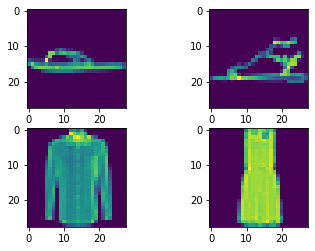

In [108]:
plt.subplot(221)
plt.imshow(X_train[30])
plt.subplot(222)
plt.imshow(X_train[300])
plt.subplot(223)
plt.imshow(X_train[3000])
plt.subplot(224)
plt.imshow(X_train[30000])
plt.show()

In [109]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print()

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)



In [110]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])

60000
28
28


In [111]:
from tensorflow.keras.utils import to_categorical

# flatten 28*28 images to a 784 vector for each image
# num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]


In [112]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    print("channels_first")
    # reshape to be [samples][pixels][rows][columns]
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
    inputShape = (1,28,28)
else:
    print('channels_last')
    # reshape to be [samples][rows][columns][pixels]
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    inputShape = (28,28,1)


channels_last


In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten

model = Sequential()

# model.add(Dense(784, input_shape=(784,), activation='relu'))
model.add(Conv2D(10, kernel_size=3, input_shape=inputShape, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, 
          validation_split=0.2, 
          batch_size=100, 
          epochs=4)

print(model.summary())

score = model.evaluate(X_test, y_test)
print(score)

Epoch 1/4
480/480 [==============================] - 5s 10ms/step - loss: 0.5249 - accuracy: 0.8206 - val_loss: 0.3794 - val_accuracy: 0.8659
Epoch 2/4
480/480 [==============================] - 4s 9ms/step - loss: 0.3474 - accuracy: 0.8783 - val_loss: 0.3387 - val_accuracy: 0.8802
Epoch 3/4
480/480 [==============================] - 4s 9ms/step - loss: 0.3069 - accuracy: 0.8902 - val_loss: 0.3185 - val_accuracy: 0.8838
Epoch 4/4
480/480 [==============================] - 5s 10ms/step - loss: 0.2819 - accuracy: 0.9003 - val_loss: 0.3024 - val_accuracy: 0.8913
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
flatten_2 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_44 (Dense